# Exploratory Data Analysis

## 1. Load the data

In [108]:
# Importing all the required libraries

import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

   Unnamed: 0                 date likes retweets      screen_name  \
0         0.0  2020-11-01 23:59:59   0.0      0.0        999naotel   
1         1.0  2020-11-01 23:59:53   1.0      0.0    Karen96562159   
2         2.0  2020-11-01 23:59:44   4.0      1.0    parisavayoubi   
3         3.0  2020-11-01 23:59:56   0.0      0.0  covid19jayapura   
4         4.0  2020-11-01 23:59:54   0.0      0.0          yaUle17   

                                               tweet                tweet_id  
0  ほんとうにお疲れ様でした。\nせっかく勝つ!!🏆👑🎌\nと信じたのに残念(´；ω；｀)\nで...  1.3230521987003515e+18  
1  @DavidCornDC My heart aches for all of us eho ...  1.3230521705984778e+18  
2  the 1 yr anniversary of Najah’s disappearance ...  1.3230521339066696e+18  
3  Giat aktivitas rutin Posko Induk Penanganan Co...  1.3230521849262653e+18  
4  Half of Slovakia's population tested for coron...  1.3230521750697165e+18  


In [ ]:
month = "11-Nov-"

table_df = pd.read_csv('data/' + month + 'Tweets.csv')
print(table_df.head())

In [109]:
# Loop through the whole list and remove the coloumn headings,
# since they repeat after every 100 entries

for i in range(len(table_df)):
    if table_df.loc[i, "tweet"] == "tweet":
        #print(i)
        table_df=table_df.drop(index=i)

print(table_df.head())


   Unnamed: 0                 date likes retweets      screen_name  \
0         0.0  2020-11-01 23:59:59   0.0      0.0        999naotel   
1         1.0  2020-11-01 23:59:53   1.0      0.0    Karen96562159   
2         2.0  2020-11-01 23:59:44   4.0      1.0    parisavayoubi   
3         3.0  2020-11-01 23:59:56   0.0      0.0  covid19jayapura   
4         4.0  2020-11-01 23:59:54   0.0      0.0          yaUle17   

                                               tweet                tweet_id  
0  ほんとうにお疲れ様でした。\nせっかく勝つ!!🏆👑🎌\nと信じたのに残念(´；ω；｀)\nで...  1.3230521987003515e+18  
1  @DavidCornDC My heart aches for all of us eho ...  1.3230521705984778e+18  
2  the 1 yr anniversary of Najah’s disappearance ...  1.3230521339066696e+18  
3  Giat aktivitas rutin Posko Induk Penanganan Co...  1.3230521849262653e+18  
4  Half of Slovakia's population tested for coron...  1.3230521750697165e+18  


## 2. Removing '@' mentions
@ mentions in the tweets aren't really useful.
We can remove them from all the tweets if any tweet
mentions another user.


In [110]:
# Get the row data from the tuple returned by iterarrows()
print( next(table_df.iterrows())[1] )


# Check for presence of @ character
print( table_df["tweet"].str.contains("@") )


# Small example showing how to remove @ mentions
import re
text="@archity how are you?"
newText=re.sub('@.*? ', '', text)
print(newText)

Unnamed: 0                                                     0
date                                         2020-11-01 23:59:59
likes                                                        0.0
retweets                                                     0.0
screen_name                                            999naotel
tweet          ほんとうにお疲れ様でした。\nせっかく勝つ!!🏆👑🎌\nと信じたのに残念(´；ω；｀)\nで...
tweet_id                                  1.3230521987003515e+18
Name: 0, dtype: object
0        False
1         True
2        False
3        False
4        False
         ...  
28981    False
28982     True
28983    False
28984     True
28985     True
Name: tweet, Length: 28697, dtype: bool
how are you?


In [111]:
df_clean=table_df

# Function for removing @ mentions and hyperlinks
def remove_mentions(text):
    newtext = re.sub('@.*? ', '', text)
    newtext = re.sub(r'https?:\/\/.*[\r\n]*', '', newtext)
    return newtext

df_clean['tweet']=table_df.tweet.apply(lambda x: remove_mentions(x))
print(type(df_clean.tweet))

<class 'pandas.core.series.Series'>


In [112]:
print(df_clean.head(40)["tweet"])


0     ほんとうにお疲れ様でした。\nせっかく勝つ!!🏆👑🎌\nと信じたのに残念(´；ω；｀)\nで...
1     My heart aches for all of us eho have lost fam...
2     the 1 yr anniversary of Najah’s disappearance ...
3     Giat aktivitas rutin Posko Induk Penanganan Co...
4     Half of Slovakia's population tested for coron...
5     ASIAN Nikkei futures +93pts, HK ADR’s  +217pts...
6     Lockdown inicia dia 17/11/2020, conforme a com...
7     Hey Chris Wallace at &amp; ~ You both said Tru...
8     #AHORA Coronavirus en Corrientes: Confirman tr...
9     William is irresponsible and continued to act ...
10    I had a teacher last year who I saw as a mom f...
11    So 4) Lets not pretend it is normal for them. ...
12    How much for memberships? Covid specials price...
13    same here - even if i did (didn't??) do my gcs...
14    Our club has been totally Covid compliant incl...
15    Cierre las playas y fuertes multas y verá que ...
16    We were planning to get married 9 months after...
17    Duchess Katherine seems to have suffered d

* We see that there are too many different types of PoS words that are present in tweets.
  It's better to utilize Python's NLTK library for further refinement.
* Remove stopwords before removing all the punctuation characters
  (otherwise some words like "couldn't" will not be removed) 
* Before removing stopwords, make all the text in lowercase.
  (so that 'I' and 'i' both are removed, since lowercase 'i' is an English stopword. 

In [121]:
# Convert all the letters of words to lowercase
df_clean['tweet'] = df_clean['tweet'].str.lower()
print(df_clean['tweet'].head(20))

0     ほんとうにお疲れ様でした。\nせっかく勝つ🏆👑🎌\nと信じたのに残念；ω；｀\nでも知事は続...
1      heart aches    us eho  lost family  friends  ...
2      1 yr anniversary  najah disappearance  unfort...
3     giat aktivitas rutin posko induk penanganan co...
4     half  slovakia population tested  coronavirus ...
5     asian nikkei futures 93pts hk adr  217pts  aus...
6     lockdown inicia dia 17112020 conforme  comunid...
7     hey chris wallace  amp    said trump  wrong sa...
8     ahora coronavirus  corrientes confirman tres n...
9     william  irresponsible  continued  act   nothi...
10       teacher last year   saw   mom figure   covi...
11     4 lets  pretend   normal     \n\n5  let us ce...
12        much  memberships covid specials price surely
13       even       gcses last year  would rather si...
14     club   totally covid compliant including  clu...
15    cierre  playas  fuertes multas  verá  aprender...
16      planning  get married 9 months   engagement ...
17    duchess katherine seems   suffered  covid 

In [114]:
# Remove stopwords 
# Let's try to download NLTK's stopwords database for English, French, and Spanish languages.

nltk.download('stopwords')

stopwords_english = stopwords.words('english') 
stopwords_french = stopwords.words('french')
stopwords_spanish = stopwords.words('spanish')

langStopwords = stopwords_english + stopwords_french + stopwords_spanish

print('Stop words\n')
print(stopwords_english)
print(stopwords_french)
print(stopwords_spanish)

langPat = r'\b(?:{})\b'.format('|'.join(langStopwords))
print(langPat)

df_clean.loc[:, 'tweet'] = df_clean.loc[:, 'tweet'].str.replace(langPat, '')

print(df_clean.head(40)["tweet"])

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
# Remove punctuation marks from every tweet

# puncChars = string.punctuation

puncChars = '''!()-[]{};:'"\,<>./?@#$%^&*_~’‘´`~|+'''
print(type(puncChars))

print(type(df_clean.loc[:, 'tweet']))
  
df_clean.loc[:, 'tweet'] = df_clean.loc[:, 'tweet'].str.translate(str.maketrans('', '', puncChars))
# Get the data type of each coloumn
#print(df_clean.dtypes)

print(df_clean.head(40)["tweet"])

<class 'str'>
<class 'pandas.core.series.Series'>
0     ほんとうにお疲れ様でした。\nせっかく勝つ🏆👑🎌\nと信じたのに残念；ω；｀\nでも知事は続...
1      heart aches    us eho  lost family  friends  ...
2      1 yr anniversary  najah disappearance  unfort...
3     giat aktivitas rutin posko induk penanganan co...
4     half  slovakia population tested  coronavirus ...
5     asian nikkei futures 93pts hk adr  217pts  aus...
6     lockdown inicia dia 17112020 conforme  comunid...
7     hey chris wallace  amp    said trump  wrong sa...
8     ahora coronavirus  corrientes confirman tres n...
9     william  irresponsible  continued  act   nothi...
10       teacher last year   saw   mom figure   covi...
11     4 lets  pretend   normal     \n\n5  let us ce...
12        much  memberships covid specials price surely
13       even       gcses last year  would rather si...
14     club   totally covid compliant including  clu...
15    cierre  playas  fuertes multas  verá  aprender...
16      planning  get married 9 months   engagement ..

In [116]:
# Go through each tweet and put individual word into a list

print("Coloumn tweet type: ", type(df_clean.tweet))

word_list = []

for tweet in df_clean.tweet:
    word_list+=(tweet.split())


#word_list[:100]
print(Counter(word_list).most_common(20))
print(type(word_list))
print(len(word_list), "total words")

Coloumn tweet type:  <class 'pandas.core.series.Series'>
[('covid', 17884), ('covid19', 8825), ('coronavirus', 3040), ('people', 2497), ('trump', 1932), ('cases', 1780), ('amp', 1651), ('get', 1574), ('like', 1353), ('deaths', 1246), ('new', 1235), ('us', 1061), ('one', 1042), ('would', 996), ('know', 886), ('time', 823), ('vaccine', 821), ('still', 821), ('go', 772), ('biden', 752)]
<class 'list'>
412357 total words


Some remarks-

* We can see that there are several article words (a, an , the), prepositions (in, of), as well as non-English prepositions (en, de) So we need to remove such non-essential words.
* 'coronavirus' and 'coronavirus.' (with a dot) are taken as two seperate words. So we may need to remove all such punctuation marks.
* 'Coronavirus' and 'coronavirus' are also treaded as two different words, so we need to take care of upper/lower case letters. 

In [117]:
# word_list_lower = list(map(lambda x:x.lower(), word_list))

# Get the count values of all the words
words_counter = Counter(word_list).most_common()

# Convert the Counter list to a Pandas dataframe
words_counter_df = pd.DataFrame.from_records(list(dict(words_counter).items()), columns=['word', 'count'])

print(len(word_list), "total words")
print(len(Counter(word_list)), "unique words")


with open('all-words.txt', 'w', encoding="utf-8") as filehandle:
    for listitem in word_list:
        filehandle.write('%s\n' % listitem)

print(words_counter_df[:20])


412357 total words
64345 unique words
           word  count
0         covid  17884
1       covid19   8825
2   coronavirus   3040
3        people   2497
4         trump   1932
5         cases   1780
6           amp   1651
7           get   1574
8          like   1353
9        deaths   1246
10          new   1235
11           us   1061
12          one   1042
13        would    996
14         know    886
15         time    823
16      vaccine    821
17        still    821
18           go    772
19        biden    752


In [118]:
# Now we remove words like covid, coronavirus
covidWords = ["covid", "coronavirus", "covid-19", "covid19"]
for covword in covidWords:
    words_counter_df.drop(words_counter_df[words_counter_df.word == covword].index, inplace=True)

# Remove "&amp;". It occurs several times ('&' and ';' have already been removed)
words_counter_df.drop(words_counter_df[words_counter_df.word == "amp"].index, inplace=True)

words_counter_df = words_counter_df.reset_index(drop=True)

print(words_counter_df[:20])
print("Total unique words: ", words_counter_df.size)

        word  count
0     people   2497
1      trump   1932
2      cases   1780
3        get   1574
4       like   1353
5     deaths   1246
6        new   1235
7         us   1061
8        one   1042
9      would    996
10      know    886
11      time    823
12   vaccine    821
13     still    821
14        go    772
15     biden    752
16     going    749
17     virus    742
18      many    741
19  pandemic    728
Total unique words:  128682


## Word Cloud

In [119]:
# Rename the column 'count' to 'freq'
words_counter_df.columns = ['word', 'freq']

# Convert pd dataframe to dictionary for input for wordcould
wordcount_dict = dict(zip(words_counter_df.word, words_counter_df.freq))
# Print first 10 items of this dict
print(list(wordcount_dict.items())[0:10])


[('people', 2497), ('trump', 1932), ('cases', 1780), ('get', 1574), ('like', 1353), ('deaths', 1246), ('new', 1235), ('us', 1061), ('one', 1042), ('would', 996)]


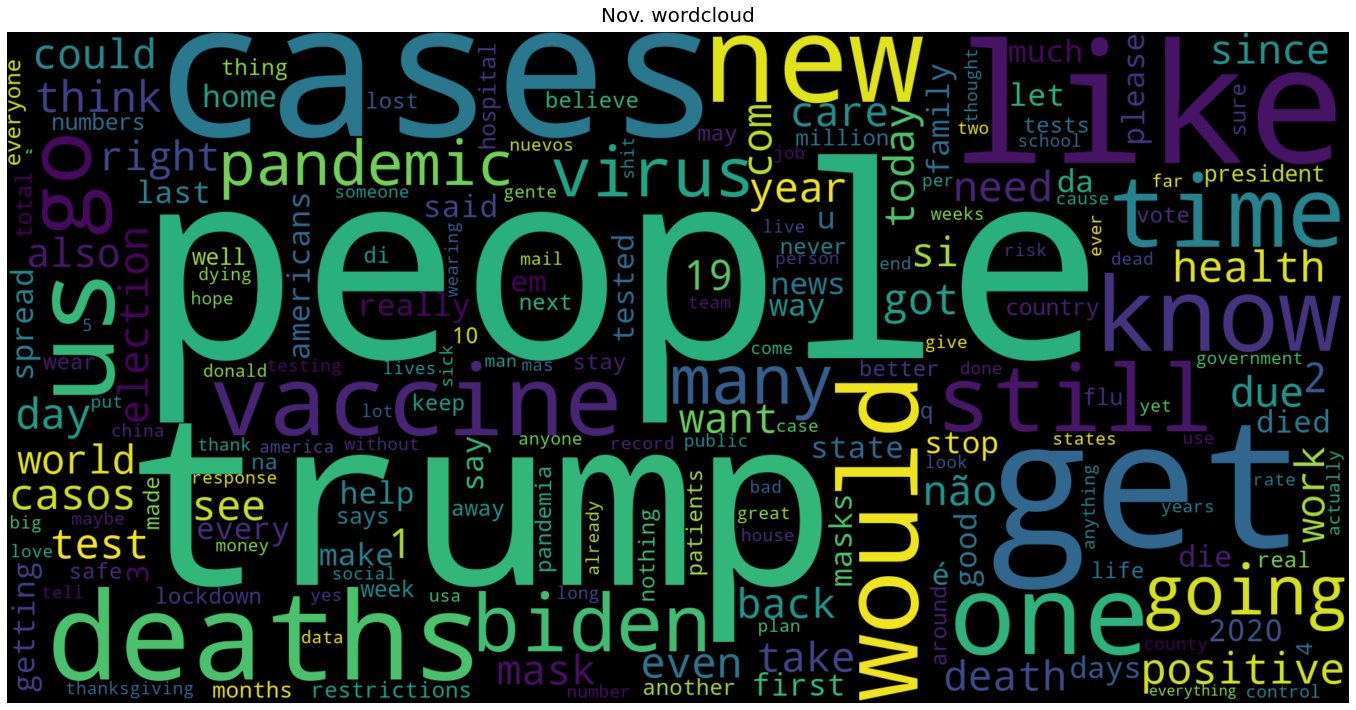

In [133]:
wc = WordCloud(width=2000, height=1000).generate_from_frequencies(wordcount_dict)
fig = plt.figure( figsize=(20,10) )
fig.suptitle(month[3:6] + '. wordcloud', fontsize=20)
plt.imshow(wc, interpolation='bilinear')
#plt.title(month + 'word cloud')
plt.axis('off')
plt.tight_layout(pad=1)
#plt.show()
wc.to_file('img/wordcloud_' + month + '.png')
plt.savefig("img/trial.png", format="png", dpi=100)
